In [1]:
import numpy as np
import os
import re
from Corrfunc.utils import convert_rp_pi_counts_to_wp
from Corrfunc.theory import DDrppi

calculate the wp

In [2]:
import pickle
with open('s_s_pair_count.bin', 'rb') as f:
    result_dict = pickle.load(f)
calc = result_dict[(1,1)]
vol = np.pi*(calc['rmax']**2 - calc['rmin']**2)*1           # delta r pi = 1

In [3]:
boxsize = 2500
NR = 1000_000_000
n = NR / (boxsize**3)
RR = calc.copy()
RR['npairs'] = (NR*vol*n*2).astype('uint64')            # this has been cross checked to be correct

In [4]:
NDs = np.load('halo_mass_function.npy')['count']
logMh_N = len(NDs)

In [5]:
pimax = 100
Nbins = len(RR['npairs'])//pimax

In [6]:
wp_array = np.zeros((logMh_N, logMh_N, Nbins))
for i in range(logMh_N):
    for j in range(i+1):
        if (i+1,j+1) not in result_dict:
            print(i,j)
            continue
        ND1 = NDs[i]
        ND2 = NDs[j]
        D1R2 = RR.copy()
        D1R2['npairs'] = ND1*vol*n*2
        D2R1 = RR.copy()
        D2R1['npairs'] = ND2*vol*n*2
        R1R2 = RR
        D1D2 = result_dict[(i+1,j+1)]
        wp = convert_rp_pi_counts_to_wp(ND1, ND2, NR, NR, D1D2, D1R2, D2R1, R1R2, pimax=pimax, nrpbins=Nbins)

        wp_array[i,j] = wp
        wp_array[j,i] = wp

In [7]:
np.save('2h_ss_wp', wp_array)

In [9]:
def ij2index(i, j):
    """
    Convert i, j to index of wp_array.
    wp_array is ordered as below:
    i       j
    1       1
    2       1
    2       2
    3       1
    3       2
    3       3
    4       1
    4       2
    ...
    """
    if i < j:
        i, j = j, i
    return i*(i-1)//2 + j-1

cross check the DR and RR

In [6]:
boxsize = 2500
X = np.random.uniform(0, boxsize, 1_000_000_0)
Y = np.random.uniform(0, boxsize, 1_000_000_0)
Z = np.random.uniform(0, boxsize, 1_000_000_0)

In [11]:
sep_min = 0.1
sep_max = 100
sep_N = 30

pimax = 140
boxsize = 2500

r_pbins = np.geomspace(sep_min, sep_max, sep_N+1)

NR = 1000_000_0
n = NR / (boxsize**3)

In [ ]:
RR = calc.copy()
RR['npairs'] = (NR*vol*n*2).astype('uint64')
RR_real = DDrppi(1, 40, pimax, r_pbins, X1=X, Y1=Y, Z1=Z, periodic=True, boxsize=boxsize, verbose=False)
RR['npairs']/RR_real['npairs']

In [ ]:
bins = np.arange(logMh_N+1) * logMh_bin + logMh_m
res = np.digitize(np.log10(halos['M_h']), bins)
halos = np.load('main_halo_zspace.npy')
halo1 = halos[res == 1]
DR_real = DDrppi(0, 40, pimax, r_pbins, X1=X, Y1=Y, Z1=Z, X2=halo1['X'], Y2=halo1['Y'], Z2=halo1['Z'], periodic=True, boxsize=boxsize, verbose=False)
D1R2 = RR.copy()
D1R2['npairs'] = len(halo1)*vol*n*2
D1R2['npairs'] / DR_real['npairs']

check the result

In [6]:
sep_min = 0.1
sep_max = 100
sep_N = 30
r_pbins = np.geomspace(sep_min, sep_max, sep_N+1)
r_p = (r_pbins[1:]*r_pbins[:-1])**0.5

In [3]:
wp_array = np.load('../mcmc/python/wp_table/2h_ss_wp.npy')

In [12]:
wp_array.shape

(161, 161, 30)

In [4]:
import matplotlib.pyplot as plt

[]

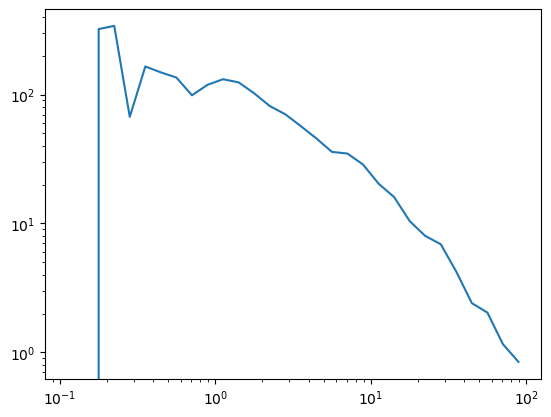

In [13]:
plt.plot(r_p, wp_array[75, 75])
plt.loglog()

[]

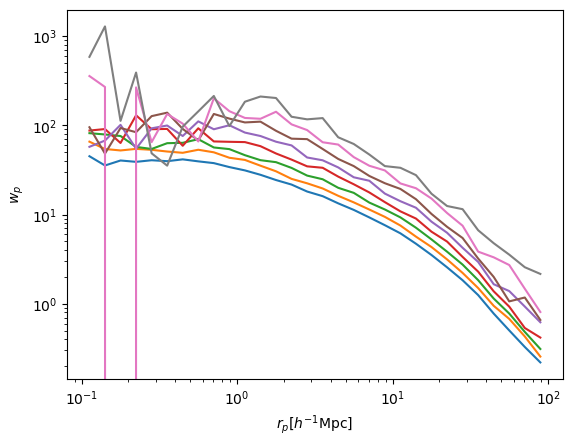

In [15]:
import matplotlib.pyplot as plt
for i in range(20, 100, 10):
    plt.plot(r_p, wp_array[i, i])
plt.xlabel(r'$r_p[h^{-1}\mathrm{Mpc}]$')
plt.ylabel('$w_p$')
plt.loglog()